In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap8
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import GoogLeNetClassifier
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.plot import plot_loss, plot_losses, show_images
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [3]:
data = FashionMNISTDataset()

In [4]:
rng = torch.Generator().manual_seed(42)

In [5]:
googlenet = GoogLeNetClassifier(
    num_outputs=10, 
    rng=rng
)

In [6]:
googlenet.init((10, 1, 28, 28))
googlenet.layer_summary((10, 1, 28, 28))

          Sequential  input shape: torch.Size([10, 1, 28, 28])
          Sequential  output shape: torch.Size([10, 48, 4, 4])
          Sequential  input shape: torch.Size([10, 48, 4, 4])
          Sequential  output shape: torch.Size([10, 256])
          Sequential  input shape: torch.Size([10, 256])
          Sequential  output shape: torch.Size([10, 10])
               Total  output shape: torch.Size([10, 10])


In [7]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [ ]:
trainer = Trainer(
    model=googlenet,
    optimizer=torch.optim.Adam(googlenet.net.parameters(), lr=0.005),
    on_train_epoch_end=eval_on_epoch
)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.8831
Epoch 0, validation accuracy 0.6598


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.7288
Epoch 1, validation accuracy 0.7270


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.6143
Epoch 2, validation accuracy 0.7697


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.5852
Epoch 3, validation accuracy 0.7791


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.5195
Epoch 4, validation accuracy 0.8035


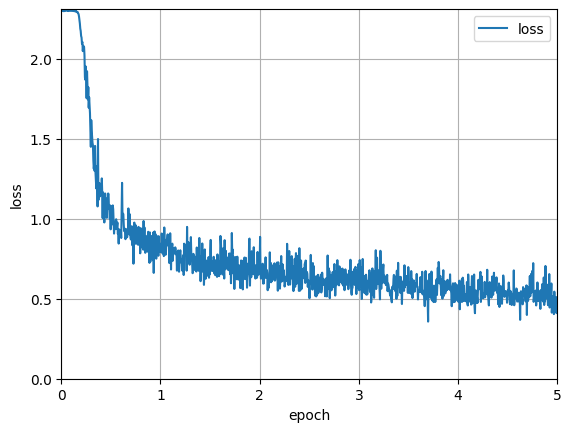

In [9]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=5)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [10]:
evaluator = ClassificationEvaluator(googlenet)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.5195
Test accuracy: 80.35%


In [11]:
# save the model
googlenet.save('googlenet_fashion_mnist.pth')